### DBSCAN Clustering

1. The main aim of this Clustering Algorithm is to form the clusters based on the details on Mall_Customers dataset like 'Customer_ID', 'Age','Gender', 'Annual_Income' and 'Spending_Score'.

### Steps used in this Project

1. Import all the necessary libraries

2. Load the dataset

3. Explore EDA and do the data processing

4. Select the relevant features

5. perform the scatter plot before the clustering technique

6. Standardize the input

7. Apply DBSCAN Clustering technique

8. Add the cluster labels to the data

9. Visualize the clusters

10. Check number of clusters

11. Analyze each cluster

### Step 1:  Import all the necessary libraries

In [879]:
### import all the necessary libraries

import  numpy                     as   np
import  pandas                    as   pd
import  matplotlib.pyplot         as   plt
import  seaborn                   as   sns   

from    sklearn.preprocessing     import StandardScaler
from    sklearn.cluster           import DBSCAN

### Step 2:  Load the dataset

In [880]:
df = pd.read_csv("Mall_Customers.csv")

In [881]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### OBSERVATIONS:

1. The above dataset contains all the records related to the Customers visiting the Malls

2. It has 200 records.

2. It has the details like:-

     (a.)   CustomerID   ----------->    ID of the Customer.

     (b.)   Genre        ----------->    Gender of the Customer.

     (c.)   Age          ----------->    Age of the Customer.

     (d.)   Annual Income (k$) ------>   Annual Income of the Customer.

     (e.)   Spending Score (1-100) --->  Spending Score of the Customer.

### Step 3:  Explore EDA and do the data processing

In [882]:
### Display the total length of the dataset

print("Total length of the records in the dataset is:", len(df))

Total length of the records in the dataset is: 200


In [883]:
### Shape of the dataset

print(df.shape)

(200, 5)


In [884]:
### Display the top five rows of the dataset

print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [885]:
### Display the bottom five rows of the dataset

print(df.tail())

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


In [886]:
### Rename the absurd column to the known columns in the dataset

df.rename(columns={'Annual Income (k$)':'Annual_Income'  ,  
                   'Genre':'Gender'                      ,
                   'Spending Score (1-100)':'Spending_Score'}, inplace=True)

In [887]:
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### OBSERVATIONS:

1.  All the columns has been renamed to their proper names.

In [888]:
### get all the unique columns in the dataset

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [889]:
### get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [890]:
### get the descriptive statistical summary about the dataset

df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### OBSERVATIONS:

1. The above figure depicts about the statistical summary about all the numerical features used in the dataset.

In [891]:
### Check if there are any NULL Values

df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

### OBSERVATIONS:

1.  There are no NULL Values in the dataset.

In [892]:
### Check for any duplicate records in the dataset

df[df.duplicated()]

,CustomerID,Gender,Age,Annual_Income,Spending_Score


### OBSERVATIONS

1.  There are no duplicate records in the dataset.

### Step 4:  Select the relevant features

In [893]:
X = df[['Annual_Income','Spending_Score']]

In [894]:
X

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### OBSERVATIONS:

1. Here we have choosen two relevant features from the dataset 

   (a.)  Annual_Income ------------> The Annual Income of the person.

   (b.)  Spending_Score -----------> The spending score of the person.

### Step 5:- perform the scatter plot before the clustering technique

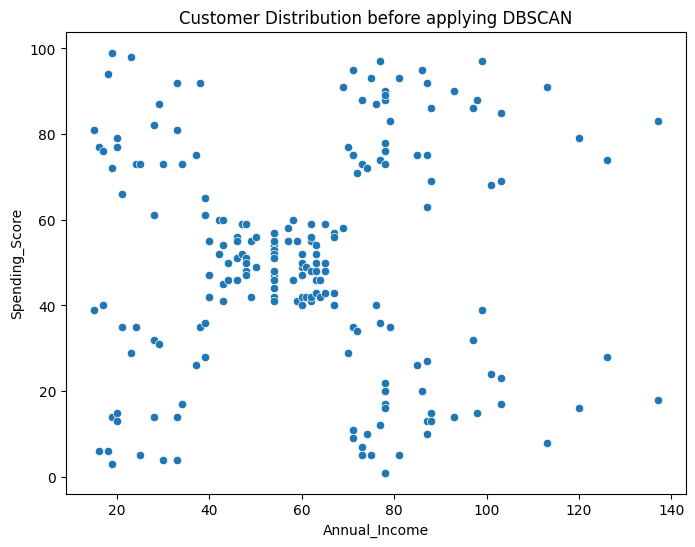

In [895]:
plt.figure(figsize=(8,6))

### perform the scatter plot for the original dataset

sns.scatterplot(x='Annual_Income', y = 'Spending_Score', data=df)

plt.title('Customer Distribution before applying DBSCAN')

plt.xlabel('Annual_Income')

plt.ylabel('Spending_Score')

plt.show()

### OBSERVATIONS:

1. The above graph shows the cluster distribution of the original dataset.

### Step 6. Standardize the input

In [896]:
from sklearn.preprocessing import StandardScaler

### create an object for Standard Scaler

sc = StandardScaler()

### transform the inputs

X_scaled = sc.fit_transform(X)

In [897]:
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### OBSERVATIONS:

1. All the inputs has been scaled in one range.

### Step 7:  Apply DBSCAN Clustering technique

In [898]:
from sklearn.cluster import DBSCAN

### Create an object for DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)

### using the object train and predict the model

Y_pred = dbscan.fit_predict(X_scaled)

In [899]:
Y_pred

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1, -1,  2, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  6,  4,  6,  4,  6, -1,
        6,  4,  6,  4,  6,  4,  6,  4,  6,  4, -1,  4,  6,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [900]:
labels = Y_pred

In [901]:
labels

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1, -1,  2, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  6,  4,  6,  4,  6, -1,
        6,  4,  6,  4,  6,  4,  6,  4,  6,  4, -1,  4,  6,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

### OBSERVATIONS:

1. Using DBSCAN Clustering technique, cluster labels have been formed.

### Step 8: Add the cluster labels to the data

In [902]:
df['cluster_label'] = labels

In [903]:
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score,cluster_label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


### OBSERVATIONS:

1. The cluster label has been assigned to each and every customer record in the dataset.

### Step 9:  Visualize the clusters

In [904]:
### get all the distinct cluster labels 

df['cluster_label'].unique()

array([ 2,  0,  1, -1,  3,  4,  5,  6])

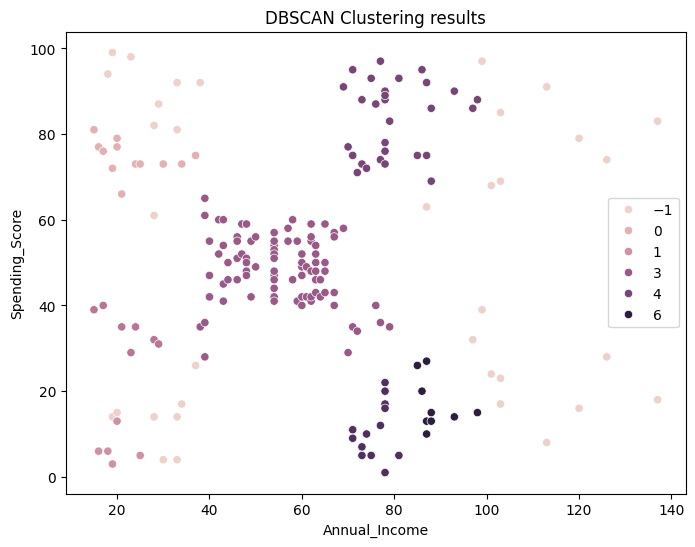

In [905]:
plt.figure(figsize=(8,6))

### perform the scatterplot for the above dataset along with the labels attached to it

sns.scatterplot(x='Annual_Income', y='Spending_Score',data=df,hue = 'cluster_label')

plt.title('DBSCAN Clustering results')

plt.legend()

plt.show()

## OBSERVATIONS:

1. Here DBSCAN Clustering has been performed on the Mall Customers dataset.

2. Six clusters have been formed with labels assigned to it.

3. Some of them are core points, border points and some of then are noise points.

### Step 10:  Check number of clusters

In [906]:
n = len(set(labels)) 

In [907]:
print("Total number of clusters is:",(n - (1 if -1 else 0)))

Total number of clusters is: 7


### OBSERVATIONS:

1. There are a total of 7 clusters formed using Hierarchical clustering.

### Step 11:  Analyze each cluster

In [908]:
for c in sorted(df['cluster_label'].unique()):
    print("Cluster is", c)
    print(df[df['cluster_label']==c][['Annual_Income','Spending_Score']].describe())

Cluster is -1
       Annual_Income  Spending_Score
count      35.000000       35.000000
mean       70.600000       51.657143
std        43.041157       34.470740
min        18.000000        4.000000
25%        29.500000       17.000000
50%        87.000000       61.000000
75%       103.000000       84.000000
max       137.000000       99.000000
Cluster is 0
       Annual_Income  Spending_Score
count      12.000000       12.000000
mean       23.166667       74.583333
std         7.120180        3.872005
min        15.000000       66.000000
25%        18.500000       73.000000
50%        20.500000       74.000000
75%        26.250000       77.000000
max        37.000000       81.000000
Cluster is 1
       Annual_Income  Spending_Score
count       5.000000        5.000000
mean       19.600000        6.600000
std         3.361547        3.781534
min        16.000000        3.000000
25%        18.000000        5.000000
50%        19.000000        6.000000
75%        20.000000        6.00000

## OBSERVATIONS:

1.  The above data shows the descriptive summary statistics for every cluster used in the dataset.